In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import math

<H3>Wykorzystanie PCA do transformacji prostych zbiorów punków</H3>

In [2]:
data1 = np.random.normal(loc=0.0, scale=0.5, size=(100,2)) + [[0,5]]*100
data2 = np.random.normal(loc=4.0, scale=0.5, size=(100,2))
data3 = np.random.normal(loc=6.0, scale=0.5, size=(100,2)) + [[-1,1]]*100

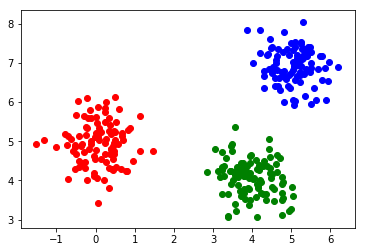

In [3]:
plt.figure()
featurex=0
featurey=1
plt.scatter(data1[:,0], data1[:,1], c='r')
plt.scatter(data2[:,0], data2[:,1], c='g')
plt.scatter(data3[:,0], data3[:,1], c='b')
#plt.plot([0, 10*pca.components_[0][0]], [0, 10*pca.components_[0][1]] )
plt.axis('equal')
plt.show()

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
dataset = np.vstack((data1,data2,data3))
principalComponents = pca.fit_transform(dataset)

In [5]:
pca.components_ [0][1]

-0.2860309264590796

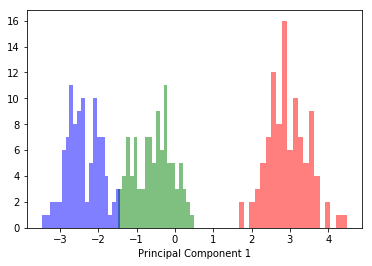

In [6]:
plt.xlabel('Principal Component 1')
colors = ['r', 'g', 'b']
for i in range(3):
    plt.hist(principalComponents[i*100:(1+i)*100], bins=20, color = colors[i], alpha = 0.5)

<H3>Przetwarzanie bazy danych irysów z użyciem PCA</H3>

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target #

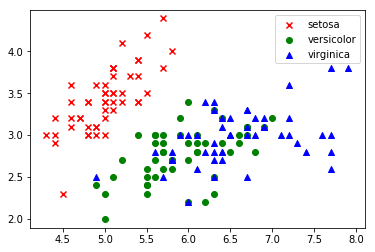

In [8]:
plt.figure()
featurex=0
featurey=1
plt.scatter(X_iris[y_iris==0,featurex],X_iris[y_iris==0,featurey], c='r', marker='x', label=iris.target_names[0])
plt.scatter(X_iris[y_iris==1,featurex],X_iris[y_iris==1,featurey], c='g', marker='o', label=iris.target_names[1])
plt.scatter(X_iris[y_iris==2,featurex],X_iris[y_iris==2,featurey], c='b', marker='^', label=iris.target_names[2])
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

Standaryzacja

In [9]:
X_iris_standarized = ( X_iris - np.mean(X_iris, axis=0) ) / np.std(X_iris, axis=0)

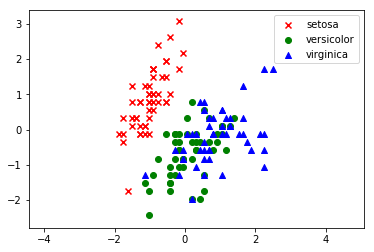

In [10]:
plt.figure()
featurex=0
featurey=1
plt.scatter(X_iris_standarized[y_iris==0,featurex],X_iris_standarized[y_iris==0,featurey], c='r', marker='x', label=iris.target_names[0])
plt.scatter(X_iris_standarized[y_iris==1,featurex],X_iris_standarized[y_iris==1,featurey], c='g', marker='o', label=iris.target_names[1])
plt.scatter(X_iris_standarized[y_iris==2,featurex],X_iris_standarized[y_iris==2,featurey], c='b', marker='^', label=iris.target_names[2])
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

In [11]:
print(np.mean(X_iris, axis=0))
print(np.mean(X_iris_standarized, axis=0))

[5.84333333 3.05733333 3.758      1.19933333]
[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


In [12]:
print(np.std(X_iris, axis=0))
print(np.std(X_iris_standarized, axis=0))

[0.82530129 0.43441097 1.75940407 0.75969263]
[1. 1. 1. 1.]


In [13]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_iris_standarized)

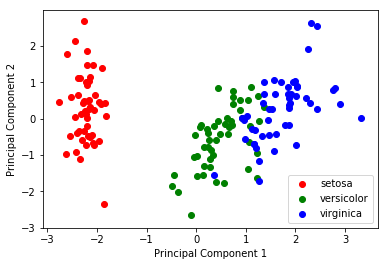

In [14]:
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
labels = list(iris.target_names)
colors = ['r', 'g', 'b']
for label, color in zip(labels,colors):
    idx = y_iris==labels.index(label)
    plt.scatter(principalComponents[idx,0], principalComponents[idx,1], c = color)
plt.legend(labels)

Wartości własne

In [15]:
pca.singular_values_

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

Znormalizowane do 1 wartości własne podniesione do kwadratu. <br>
Udział variancji poszczególnych komponentów w wariancji całego zbioru.

In [16]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

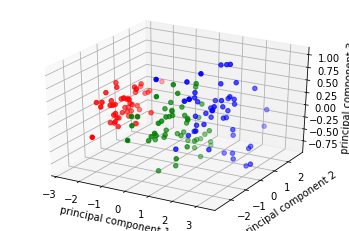

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

labels = list(iris.target_names)
colors = ['r', 'g', 'b']
for label, color in zip(labels,colors):
    idx = y_iris==labels.index(label)
    ax.scatter(principalComponents[idx,0],principalComponents[idx,1], principalComponents[idx,2], c=color,label=iris.target_names[0])

ax.set_xlabel("principal component 1")
ax.set_ylabel("principal component 2")
ax.set_zlabel("principal component 3")

plt.show()

In [18]:
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [19]:
%matplotlib inline

<H3>Twarze własne</H3>

Wczytywanie danych z folderu, obliczenie twarzy średniej i odjęcie jej od wszystkich twarzy.<br>
$\Gamma$ - wektor obrazu - spłaszczone zdjęcie<br>
$M$ - liczba obrazów<br>
$\Psi = \frac{1}{M} \sum_{i=1}^M \Gamma_i$ - twarz średnia<br>
$\Phi_i = \Gamma_i - \Psi$ - znormalizowane twarze

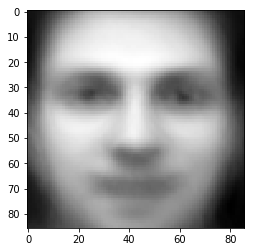

In [20]:
import os
import cv2

def get_images():
    """
    Funkcja wczytuje zdjęcia twarzy z katalogu faces_database do pamięci. Następuje stworzenie
    macierzy zawierającej "spłaszone" zdjęcia (wektory), z których jest liczona "średnia
    twarz", która jest odejmowana od każdego ze zdjęć w macierzy. 
    """

    labels = []
    label_id = -1

    imagedir = os.path.join(os.getcwd(), 'faces_database')

    # Przejście przez wszystkie zdjęcia w katalog, spłaszczenie i dopisanie do macierzy
    # *image_matrix* zawierającej wszystkie spłaszczone zdjęcia.
    image_matrix = []
    for file in os.listdir(imagedir):
        im = cv2.imread(os.path.join(imagedir, file), 0)
        image_matrix.append(np.array(im).flatten())
        labels.append(label_id)
    image_shape = im.shape
    labels = np.array(labels)

    # Policzenie "twarzy średniej", poprzez średnią arytmetyczną każdego piksela we wszystkich zdjęciach
    image_matrix_raw = np.array(np.transpose(image_matrix))

    mean_img = np.sum(image_matrix, axis=0) / len(image_matrix)
    mean_img = mean_img.reshape(image_shape)

    plt.imshow(mean_img, cmap='gray')

    # Subtract the mean from every flattened image
    image_matrix_norm = np.array([x - mean_img.flatten() for x in image_matrix])
    return image_matrix, image_matrix_norm, labels, image_shape, mean_img
images, images_norm, labels, image_shape, mean_img = get_images()

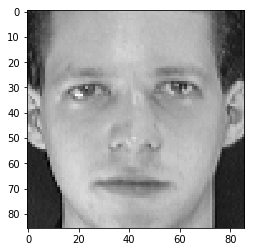

In [21]:
plt.imshow(images[0].reshape((image_shape)), cmap='gray')

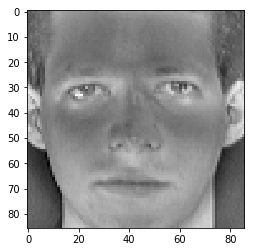

In [22]:
plt.imshow(images_norm[0].reshape((image_shape)), cmap='gray')

Obliczenie macierzy kowariancji<br>
$ C = \frac{1}{M} \sum_{n=1}^{M} \Phi_n \Phi_n^T = AA_T$ - macierz kowariancji $N^2 x N^2$<br>
$A = [\Phi_1 \Phi_2 ... \Phi_M]$ - macierz $N^2 x M$

Obliczenie twarzy własnych (wektorów własnych) macierzy  $AA^T$<br>

W celu obliczenia wektorów własnych macierzy $AA^T$ wykorzystamy wektory własne mniejszej macierzy $A^TA$ rozmiaru $MxM$<br>
$A^TA v_i = \mu_i v_i $<br> 
$AA^TA v_i = \mu_i A v_i$<br> 
$C A v_i = \mu_i A v_i$<br> 
$C u_i = \mu_i u_i$<br> 
$u_i = Av_i$<br>

In [23]:
from sklearn.preprocessing import normalize

def get_eigenfaces(images, image_shape, variance=0.99):
    """
    Wyznaczenie twarzy własnych. W pierwszej kolejności wyznaczna jest macierz kowariancji z
    użyciem macierzy zawierającej wszystkie spłaszczone zdjęcia z twarzami z odjętą od nich
    "twarzą średnią". Jest ona obliczana jako A.T A w celu ograniczenia złożoności obliczeniowej.
    Wymiarowość takiej macierzy to macierz kwadratowa o długości/szerokości równej liczbie
    dodanych zdjęć. Następnie liczone są wektory własne dla tej macierzy, a następnie wyznaczane są
    twarze własne. 
    """

    # Przygotuj macierz kowariancji równej A^T*A dla obliczeniowej wydajności
    cov_matrix = np.matmul(images.transpose(), images)
    cov_matrix /= len(images)

    # Policz i wybierz wektory własne odpowiadające najwyższym wartościom własnym
    pca = PCA(n_components=variance)
    pca.fit(cov_matrix)

    # Lewostronne przemnożenie aby otrzymać właściwe wektory własne
    eigenvectors = np.matmul(images, pca.components_.T).T    
    return eigenvectors, pca.explained_variance_ratio_
    
eigenvectors, explained_variance_ratio_ = get_eigenfaces(images_norm.T, image_shape[0], 0.9999)
eigenvectors = np.array([ev/np.linalg.norm(ev) for ev in eigenvectors])

In [24]:
np.shape(eigenvectors)

(175, 7396)

Otrzymane wektory własne można przedstawić jako obrzay.

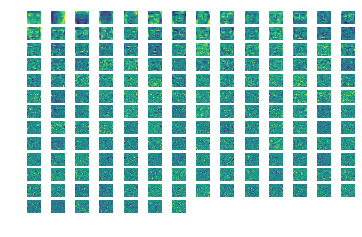

In [25]:
cells = math.ceil(np.sqrt(len(eigenvectors)))

for i in range(len(eigenvectors)):
    plt.subplot(cells,cells,i+1)
    plt.imshow(eigenvectors[i].reshape(image_shape))
    plt.axis('off')
plt.show()

Każda twarz z bazy może być reprezentowana za pomocą liniowej kombinacji wektorów własnych oraz twarzy średniej.<br>
$\Gamma_i - \Psi = \sum_{j=1}^K w_j u_j$ <br>
$w_j = u_j^T \Phi_i$

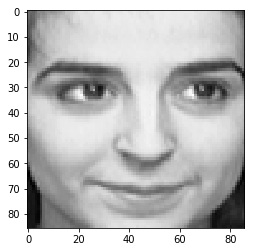

In [26]:
plt.figure()
plt.imshow(images[10].reshape(image_shape), cmap='gray')

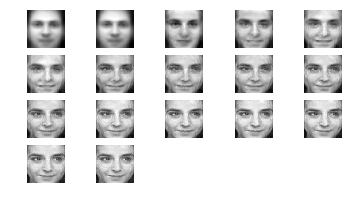

In [27]:
cells = math.ceil(np.sqrt(len(eigenvectors)/10))
reconstruction = mean_img
for i in range(int(len(eigenvectors)/10)):
    plt.subplot(cells,cells,i+1)
    plt.imshow(reconstruction.reshape(image_shape), cmap='gray')
    plt.axis('off')
    
    a=np.matmul(images_norm[10], eigenvectors[:i*10].T)#reprezentacja twarzy w nowej przestrzeni cech
    b=np.matmul(a, eigenvectors[:i*10])#rekonstrukcja 
    reconstruction=mean_img+b.reshape(image_shape)
    
plt.show()

Wizualizacja przestrzeni za pomoca TSNE

In [28]:
images_new = np.matmul(images_norm, eigenvectors.T)

In [29]:
np.shape(images_new)

(290, 175)

In [30]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=5, early_exaggeration=16).fit_transform(images_new)

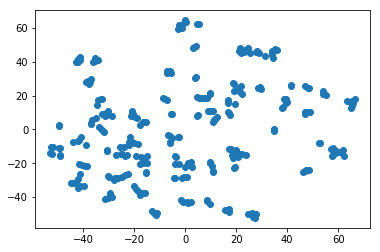

In [31]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

x = tsne[:,0]
y = tsne[:,1]
images_array = images

fig = plt.figure()
ax = fig.add_subplot(111)

cmap = plt.get_cmap('gray')#, cmap='gray'
#colors = [cmap(i/42) for i in labels[random_indices]]
#colors = [cmap(i/3) for i in labels_groups[random_indices]]

line = ax.scatter(x,y, marker="o")#, color=colors)

im = OffsetImage(images[0].reshape((image_shape)), zoom=2, cmap=cmap)
xybox=image_shape#(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.3,  arrowprops=dict(arrowstyle="->"))

ax.add_artist(ab)
ab.set_visible(False)

def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        # find out the index within the array from the event
        ind = line.contains(event)[1]["ind"][0]
        # get the figure size
        w,h = fig.get_size_inches()*fig.dpi
        ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        # make annotation box visible
        ab.set_visible(True)
        # place it at the position of the hovered scatter point
        ab.xy =(x[ind], y[ind])
        # set the image corresponding to that point
        im.set_data(images_array[ind].reshape((image_shape)))
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover)           
plt.show()

In [32]:
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [33]:
%matplotlib inline